# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# *Traffic Sign Classifier Project- November 2017*

---
## Step 0: Load The Data

*First, I loaded the traffic sign data.*

In [ ]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_valid_orig, y_valid = valid['features'], valid['labels']
X_test_orig, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

* In this step, I explored the dimensions of of the data set

In [2]:
### View the shape of the date
# TODO: Number of training examples
n_train = X_train_orig.shape[0]
#print(y_train)
# TODO: Number of validation examples
n_validation = X_valid_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train_orig.shape[1]
#print(set(y_train))
# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(set(y_train_orig))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.cm as cm # 
import random
import numpy as np
import scipy
# Visualizations will be shown in the notebook.
%matplotlib inline

255
32
(2, 32, 32, 3)
137 15
(2, 32, 32, 3)
81 6
(32, 32, 3)
255 0
0.502142535273 0.0
255


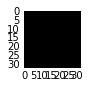

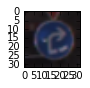

In [17]:
### augment data
print(np.amax(X_train_orig))
from skimage import transform as transform
from skimage.transform import ProjectiveTransform
from skimage.transform import warp
def projective_transform(img):
    img_aug = np.zeros((1,32,32,3))
    intensity = 0.75
    size = img.shape[1]
    d = size * 0.3*intensity
    print(size)
    for i in range(img.shape[0]):
        print(img.shape)
        tl_top    = random.uniform(-d,d)
        tl_left   = random.uniform(-d,d)
        tr_top    = random.uniform(-d,d)
        tr_right  = random.uniform(-d,d)
        bl_bottom = random.uniform(-d,d)
        bl_left   = random.uniform(-d,d)
        br_bottom = random.uniform(-d,d)
        br_right  = random.uniform(-d,d)
        
        transform = ProjectiveTransform()
        transform.estimate(np.array((
                    (tl_top,tl_left),
                    (tr_top,size - tr_right),
                    (size - br_bottom, size - br_right),
                    (size - bl_bottom, bl_left))),
                    np.array((
                    (0,0),
                    (0,size,),
                    (size,size),
                    (size,0))))
        
        temp = warp(img[i,:,:,:], transform, output_shape=(size, size), order =1, mode= 'edge')
        temp = temp.reshape((1,32,32,3))
        print(np.amax(temp),np.amin(temp))
        img_aug = np.append(img_aug,temp, axis = 0)
    np.delete(img_aug, (0), axis=0)
    return img_aug 

X_train_aug = projective_transform(X_train_orig[0:2,:,:,:])
print(X_train_aug[0].shape)
print(np.amax(X_train_orig),np.amin(X_train_orig))
print(np.amax(X_train_aug),np.amin(X_train_aug))

printimage(X_train_aug[0])
printimage(X_train_orig[0])
print(np.amax(X_train_orig))



I defined two helper functions to help print out images, and they are helpful in model construction.

In [4]:
#print a color image
def printimage(image):
    image = image.squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

#print a grayscale image
def printgray(image):
    plt.figure(figsize=(1,1))
    plt.imshow(image.squeeze(), cmap = cm.Greys_r)

I imported the signname file which contains a mapping of traffic signs and the corresponding y values. I mapped each traffic sign name to the corresponding y value, and also calculated the number of training images for each sign name. For ease of visualization, a sample image for each sign name is printed out, with a label on the top noting the y value and the number of training samples.

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


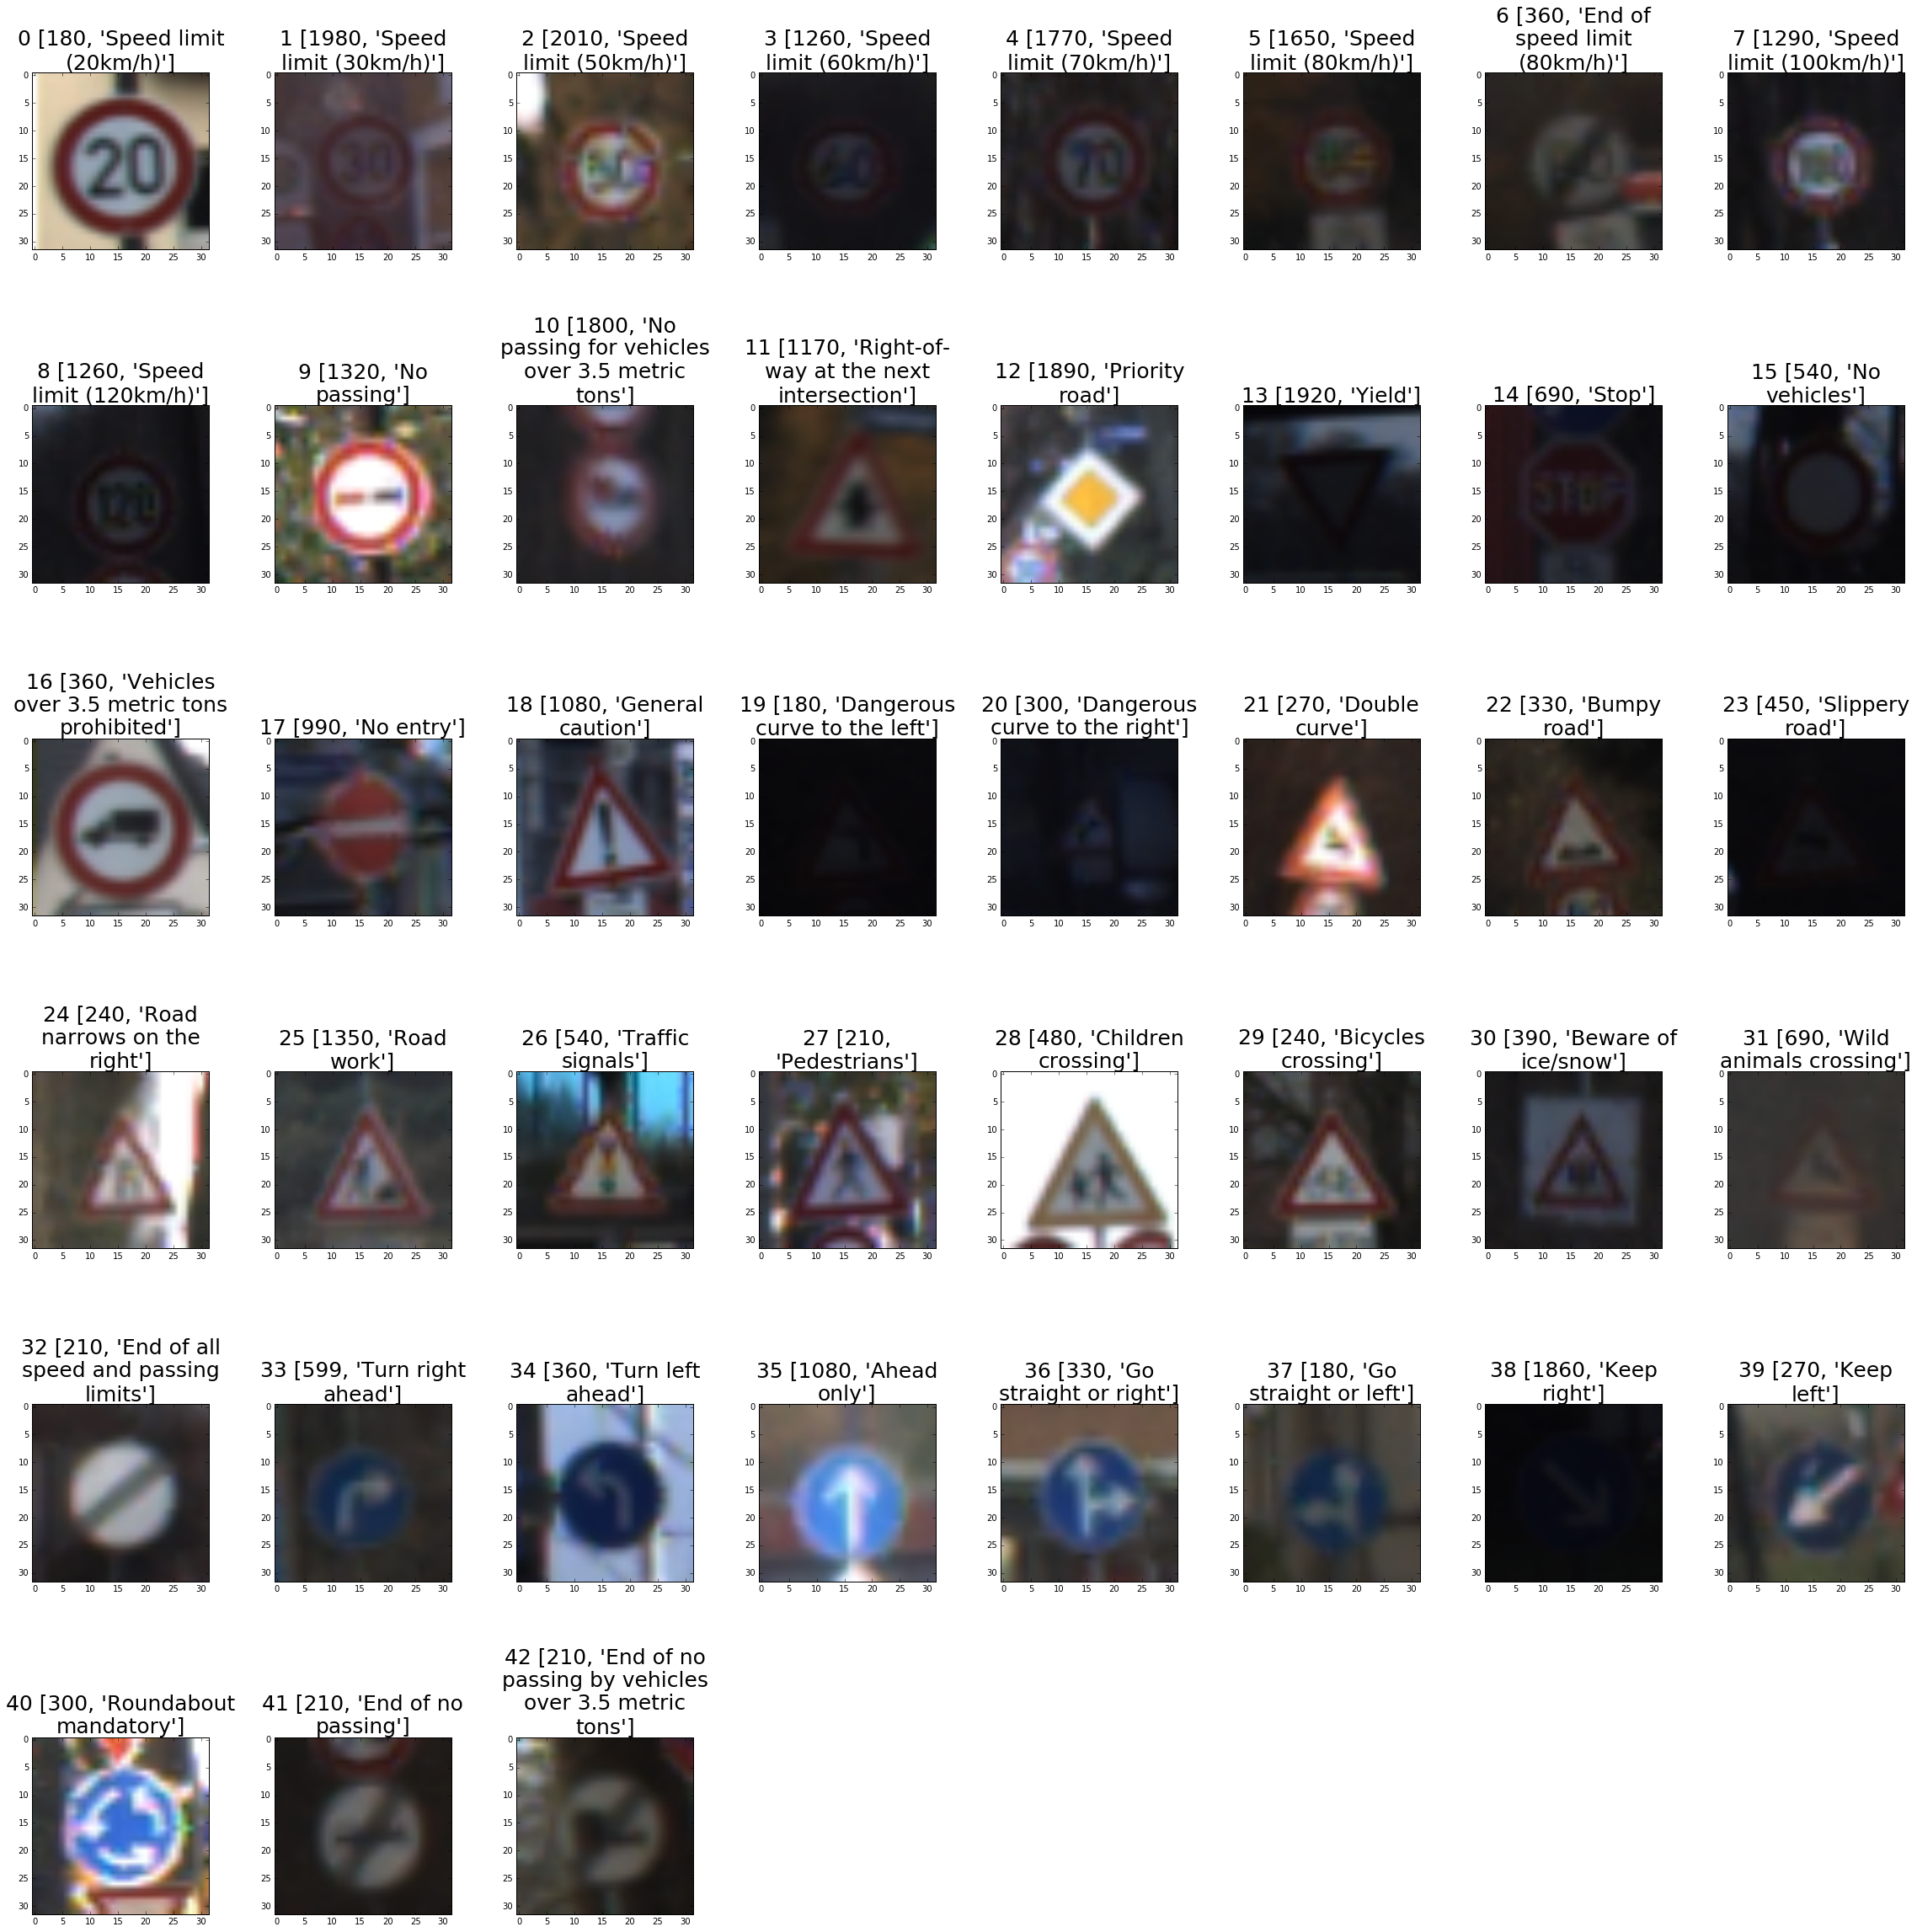

In [5]:
### analyze the data and visualzie
import pandas as pd
import textwrap
from textwrap import wrap

# number of examples for each sign
unique, counts = np.unique(y_train_orig, return_counts=True)
cntdict = dict(zip(unique, counts))
#print(np.asarray((unique, counts)).T)

#from scipy.stats import itemfreq
#print(itemfreq(y_train))

# read sign dictionay
import csv
mydict = None
with open('signnames.csv', 'r') as csvfile:
    next(csvfile, None)
    reader = csv.reader(csvfile, delimiter = ',', quotechar = '"')
    mydict = {rows[0]:rows[1] for rows in reader}
#mydict = {int(k):int(v) for k,v in mydict.items()}
mydict = {int(key):mydict[key] for key in mydict}

#print(mydict)
#plt.imshow(img)

zdict = {}
for key in (cntdict.keys() | mydict.keys()):
    if key in cntdict: zdict.setdefault(key, []).append(cntdict[key])
    if key in mydict: zdict.setdefault(key, []).append(mydict[key])

#visualize each sign
fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':8})
for i in range(n_classes):
    ind = np.where(y_train_orig==i)
    img = X_train_orig[ind[0][0]]
    img = img.squeeze()
    #print(ind[0][0])
    ax = fig.add_subplot(int(n_classes/8)+1,8,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img)
    title = str(y_train_orig[ind[0][0]])+" "+ str(zdict[y_train_orig[ind[0][0]]])
    ax.set_title("\n".join(wrap(title, 20)), fontsize=25)#(mydict[y_train[ind[0][0]]], fontsize=15)
    #print(i, img.shape)
plt.show() 

*The histogram below shows how many training samples each traffic sign have.*

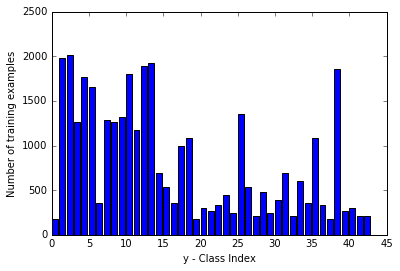

In [65]:
plt.bar(list(cntdict.keys()), cntdict.values(), color='b')
ax.set_xticks(list(cntdict.keys()), minor=True)
plt.xlabel("y - Class Index")
plt.ylabel("Number of training examples")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

-------------------------
I first transformed the image from color to grayscale. I have tried to run the model using color image, but the performance is no better than that using grayscale images. Therefore, I decided to go with grayscale since it would reduce the dimension of the data, and therefore expediate the training process. Below is an example of several training images compared with the corresponding grayscale images.

I have also tried to apply histogram equalization on the images, since a lot of images appear to be dark. However, that does not appear to improve the performance much. Therefore, I excluded it from the final data processing.

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


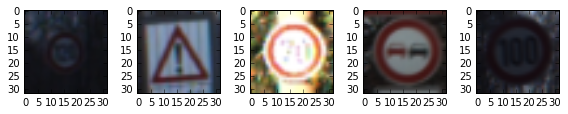

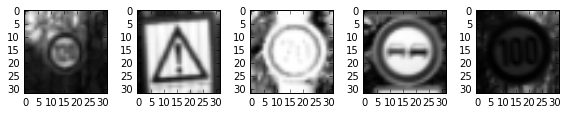

In [81]:
#shuffle the data
from sklearn.utils import shuffle
from skimage import exposure
X_train_orig, y_train_orig = shuffle(X_train_orig, y_train_orig)

#print(X_train_orig.shape)
index = random.randint(0, len(X_train_orig))

def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    #gray = np.reshape(gray,(gray.shape[0],32,32,1))
    gray = gray.reshape(gray.shape+(1,))
    return gray

def equalizes(X_train_orig):
    batchsize = 2000
    numRound = int(np.ceil(X_train_orig.shape[0]/batchsize))
    X_train_origE= np.zeros((1,32,32,1))
    for h in range(numRound):
        X_train_origE1= np.zeros((1,32,32,1))
        for i in range(h*batchsize, min((h+1)*batchsize,X_train_orig.shape[0])):
            temp = exposure.equalize_hist(X_train_orig[i,:,:,:]).reshape((1,32,32,1))
            X_train_origE1 = np.append(X_train_origE1,temp, axis = 0)
        X_train_origE1 = np.delete(X_train_origE1, (0), axis=0)
        X_train_origE = np.append(X_train_origE,X_train_origE1, axis = 0)
        print(h)
    X_train_origE = np.delete(X_train_origE, (0), axis=0)    
    
    return X_train_origE

X_train_Gray = rgb2gray(X_train_orig)
X_train_GrayE = X_train_Gray#equalizes(X_train_Gray)

X_valid_Gray = rgb2gray(X_valid_orig)
X_valid_GrayE = X_valid_Gray#equalizes(X_valid_Gray)

X_test_Gray = rgb2gray(X_test_orig)
X_test_GrayE = X_test_Gray#equalizes(X_test_Gray)

fig = plt.figure(figsize=(8,32), tight_layout={'h_pad':8})
for i in range (5):
    img = X_train_orig[i,:,:,:].squeeze()
    ax = fig.add_subplot(1,5,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img)
plt.show()

fig = plt.figure(figsize=(8,32), tight_layout={'h_pad':8})
for i in range (5):
    img = X_train_GrayE[i,:,:,:].squeeze()
    ax = fig.add_subplot(1,5,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img, cmap = cm.Greys_r)
plt.show()

In order to expand the training set, I have applied two sets of rotation to the images. That expands the training set by three times. Below is an example of the images pre and post rotation.

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


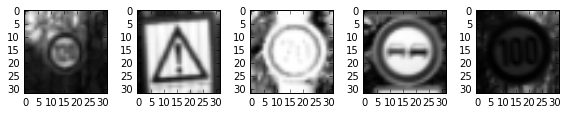

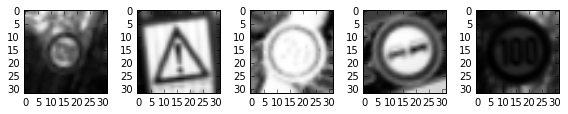

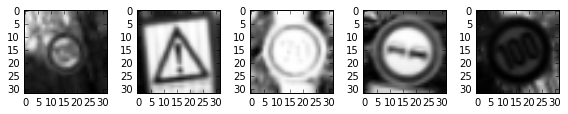

In [82]:
from skimage.transform import rotate
def rotates(X, intensity):
    batchsize = 2000
    numRound = int(np.ceil(X.shape[0]/batchsize))
    #print(numRound)
    X_R= np.zeros((1,32,32,1))
    for h in range(numRound):
        X_R1= np.zeros((1,32,32,1))
        for i in range(h*batchsize, min((h+1)*batchsize,X.shape[0])):
            delta = 30. * intensity 
            temp = rotate(X[i], random.uniform(-delta, delta),mode='edge').reshape((1,32,32,1))
            X_R1 = np.append(X_R1,temp, axis = 0)
        X_R1 = np.delete(X_R1, (0), axis=0)
        X_R = np.append(X_R,X_R1, axis = 0)
        #print(h)
    X_R = np.delete(X_R, (0), axis=0)        
    return X_R
X_train_R1 = rotates(X_train_GrayE,0.9)
X_train_R2 = rotates(X_train_GrayE,0.9)

fig = plt.figure(figsize=(8,32), tight_layout={'h_pad':8})
for i in range (5):
    img = X_train_GrayE[i,:,:,:].squeeze()
    ax = fig.add_subplot(1,5,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img, cmap = cm.Greys_r)
plt.show()

fig = plt.figure(figsize=(8,32), tight_layout={'h_pad':8})
for i in range (5):
    img = X_train_R1[i,:,:,:].squeeze()
    ax = fig.add_subplot(1,5,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img, cmap = cm.Greys_r)
plt.show()

fig = plt.figure(figsize=(8,32), tight_layout={'h_pad':8})
for i in range (5):
    img = X_train_R2[i,:,:,:].squeeze()
    ax = fig.add_subplot(1,5,i+1) 
    #img_s = imresize(img, [32,32])
    ax.imshow(img, cmap = cm.Greys_r)
plt.show()

Here I added the rotated data to the original training dataset. The number of training set is thrice the original size.

In [10]:
X_train_GrayE = np.append(X_train_GrayE,X_train_R1, axis = 0)
y_train = np.append(y_train_orig,y_train_orig,axis = 0)
X_train_GrayE = np.append(X_train_GrayE,X_train_R2, axis = 0)
y_train = np.append(y_train,y_train_orig,axis = 0)

print(y_train.shape)
print(X_train_R1.shape)
print(X_train_R2.shape)
print(X_train_GrayE.shape)
print(X_train_orig.shape)


(104397,)
(34799, 32, 32, 1)
(34799, 32, 32, 1)
(104397, 32, 32, 1)
(34799, 32, 32, 3)


In this step, I normalized all the X data to be between 0 and 1.

In [11]:
### normalize the data so that the X values are between 0 and 1
print(np.amax(X_train_GrayE),np.amin(X_train_GrayE))
print(X_train_GrayE.shape)
def normalize(X_orig):
    X = np.copy(X_orig)
    X = X/255
    #X = (X - 128)/128
    return X
X_train = normalize(X_train_GrayE)
X_valid = normalize(X_valid_GrayE)
X_test = normalize(X_test_GrayE)
#print(np.amax(X_train),np.amin(X_train))


254.9745 3.4126
(104397, 32, 32, 1)
0.9999 0.013382745098


## Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.import tensorflow as tf
import tensorflow as tf
tf.reset_default_graph()
EPOCHS = 24
BATCH_SIZE = 128

In [13]:
from tensorflow.contrib.layers import flatten

conv1_featuremap = None
conv2_featuremap = None

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    global conv1_featuremap, conv2_featuremap
    
    #TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    #print(x.get_shape)
    W1 = tf.get_variable("W1", shape =[5, 5, 1, 6], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", shape =[6], initializer = tf.constant_initializer(0.0))
    conv1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    #print(x.get_shape)
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1_featuremap = conv1
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k = 2
    temp = tf.nn.max_pool(conv1, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')
    conv1 = tf.nn.dropout(temp, keep_prob_conv)
    #print(x.get_shape)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.get_variable("W2", shape =[5, 5, 6, 16], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", shape =[16], initializer = tf.constant_initializer(0.0))
    conv2 = tf.nn.conv2d(conv1, W2, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    #print(x.get_shape)    
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2_featuremap = conv2
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k = 2
    temp2 = tf.nn.max_pool(conv2, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')
    conv2 = tf.nn.dropout(temp2, keep_prob_conv)
    #print(x.get_shape)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    #print(x.get_shape)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    Wf1 = tf.get_variable("Wf1", shape =[400, 120], initializer = tf.contrib.layers.xavier_initializer())
    bf1 = tf.get_variable("bf1", shape =[120], initializer = tf.constant_initializer(0.0))
    temp3 = tf.add(tf.matmul(fc0, Wf1), bf1)
    fc1 = tf.nn.dropout(temp3, keep_prob)
    #print(x.get_shape)
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    Wf2= tf.get_variable("Wf2", shape =[120, 84], initializer = tf.contrib.layers.xavier_initializer())
    bf2 = tf.get_variable("bf2", shape =[84], initializer = tf.constant_initializer(0.0))
    temp4 = tf.add(tf.matmul(fc1, Wf2), bf2)
    fc2 = tf.nn.dropout(temp4, keep_prob)
    #print(x.get_shape)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    Wf3= tf.get_variable("Wf3", shape =[84, n_classes], initializer = tf.contrib.layers.xavier_initializer())
    bf3 = tf.get_variable("bf3", shape =[n_classes], initializer = tf.constant_initializer(0.0))
    fc3 = tf.add(tf.matmul(fc2, Wf3), bf3)
    #print(x.get_shape)
    logits = fc3
    
    return logits

In [14]:
# Features and Labels
# Train LeNet to classify MNIST data.
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)
#print(n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1,keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Validation Accuracy = 0.831, training accuracy = 0.852

EPOCH 2 ...
Validation Accuracy = 0.888, training accuracy = 0.928

EPOCH 3 ...
Validation Accuracy = 0.909, training accuracy = 0.957

EPOCH 4 ...
Validation Accuracy = 0.913, training accuracy = 0.971

EPOCH 5 ...
Validation Accuracy = 0.927, training accuracy = 0.978

EPOCH 6 ...
Validation Accuracy = 0.934, training accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.935, training accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.939, training accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.938, training accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.943, training accuracy = 0.990

EPOCH 11 ...
Validation Accuracy = 0.942, training accuracy = 0.992

EPOCH 12 ...
Validation Accuracy = 0.945, training accuracy = 0.992

EPOCH 13 ...
Validation Accuracy = 0.944, training accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.941, training accuracy = 0.994

EPOCH 15 ...
Validation Accura

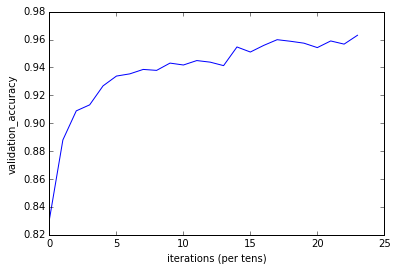

Model saved


In [17]:
#train the model
val_accuracy = []
with tf.Session() as sess:
    np.random.seed(1)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.8, keep_prob_conv:0.9})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, training accuracy = {:.3f}".format(validation_accuracy,training_accuracy))
        print()
        val_accuracy.append(validation_accuracy)
        
    plt.plot(np.squeeze(val_accuracy))
    plt.ylabel('validation_accuracy')
    plt.xlabel('iterations (per tens)')
    #plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    saver.save(sess, './lenet')
    print("Model saved")

In [14]:
### test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet


INFO:tensorflow:Restoring parameters from ./lenet


Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Here are the several images from the German traffic sign images. I first resized the images to 32x32x3.

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


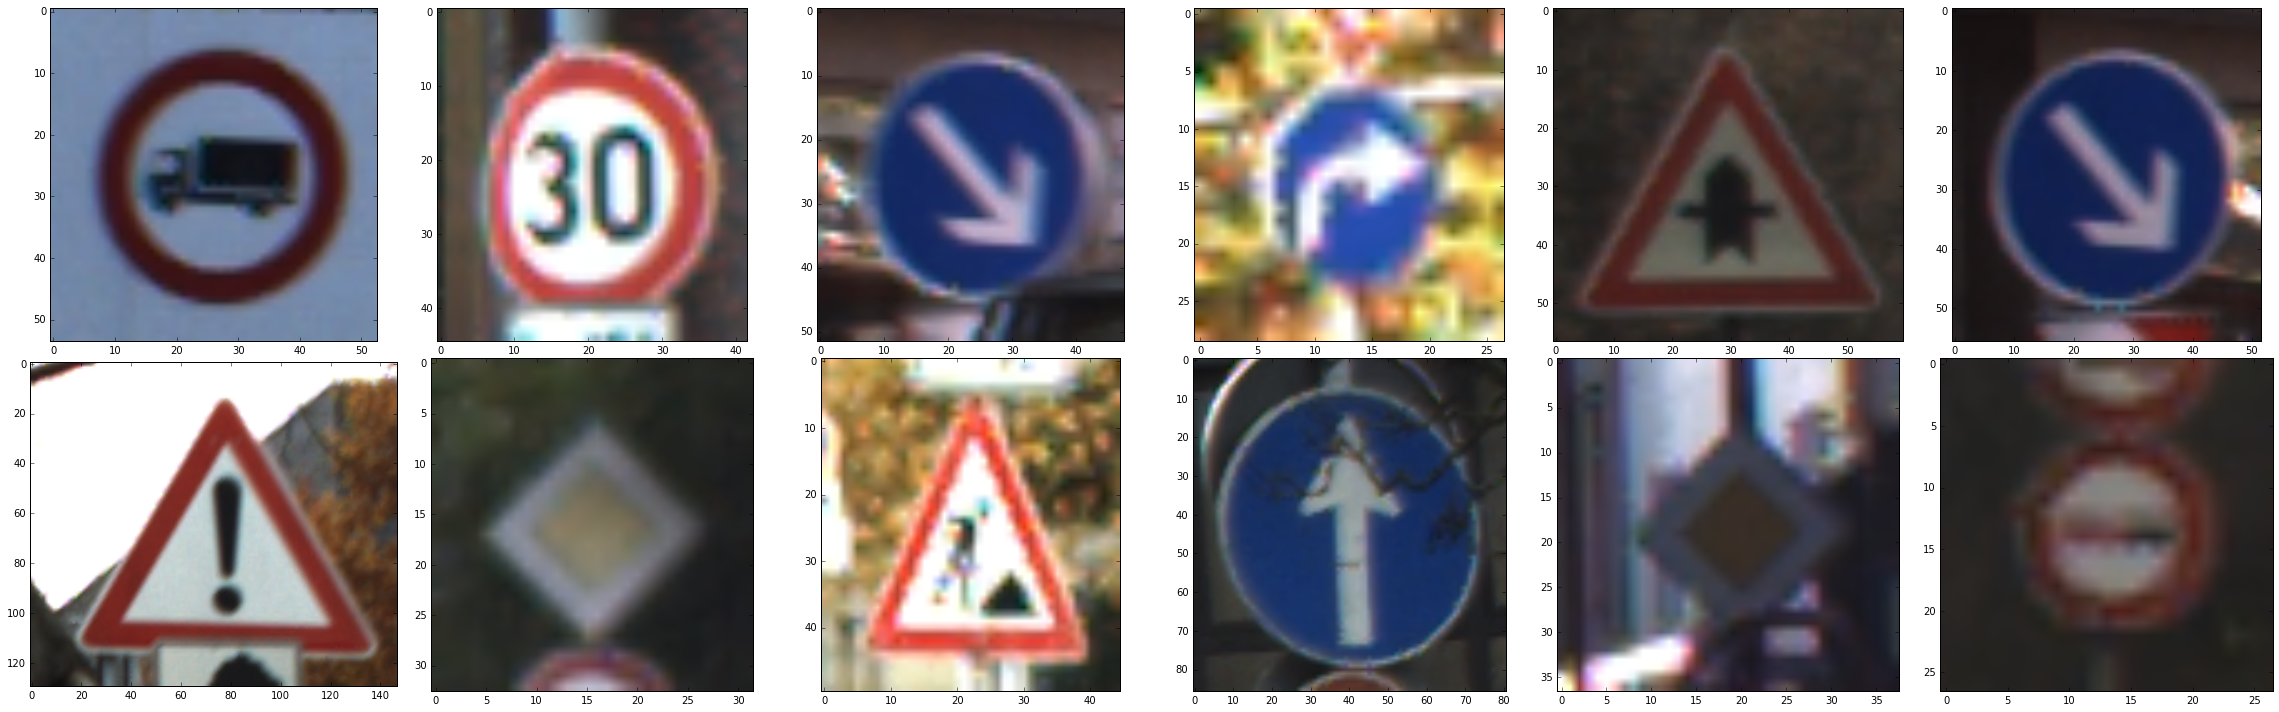

In [21]:
### Load the images and plot them here.
from scipy.misc.pilutil import imread
import cv2

filename = ["00000.ppm",
            "00001.ppm",
           "00002.ppm",
           "00003.ppm",
           "00004.ppm",
           "00005.ppm",
           "00006.ppm",
           "00007.ppm",
           "00008.ppm",
           "00009.ppm",
           "00010.ppm",
           "00015.ppm"]
fig = plt.figure(figsize=(32,10), tight_layout={'h_pad':0})
numImage = len(filename)
img_resize = np.zeros((len(filename),32,32,3))
for i in range(numImage):
    img = imread("sign_data/"+ filename[i])
    img_resize[i,:,:,:] = cv2.resize(img,None,fx=32/img.shape[1], fy=32/img.shape[0], interpolation = cv2.INTER_CUBIC)
    ax = fig.add_subplot(2,6,i+1) 
    ax.imshow(img)
    #ax.imshow(img_resize[i,:,:,:])
    #print(i, img_resize[i,:,:,:].shape)
    

### Predict the traffic signs

I first applied the same pre-processing procedures including grayscale and normalization to the dataset. Then, I ran the data through the model, and here is the predicted results:

INFO:tensorflow:Restoring parameters from ./lenet


INFO:tensorflow:Restoring parameters from ./lenet
/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


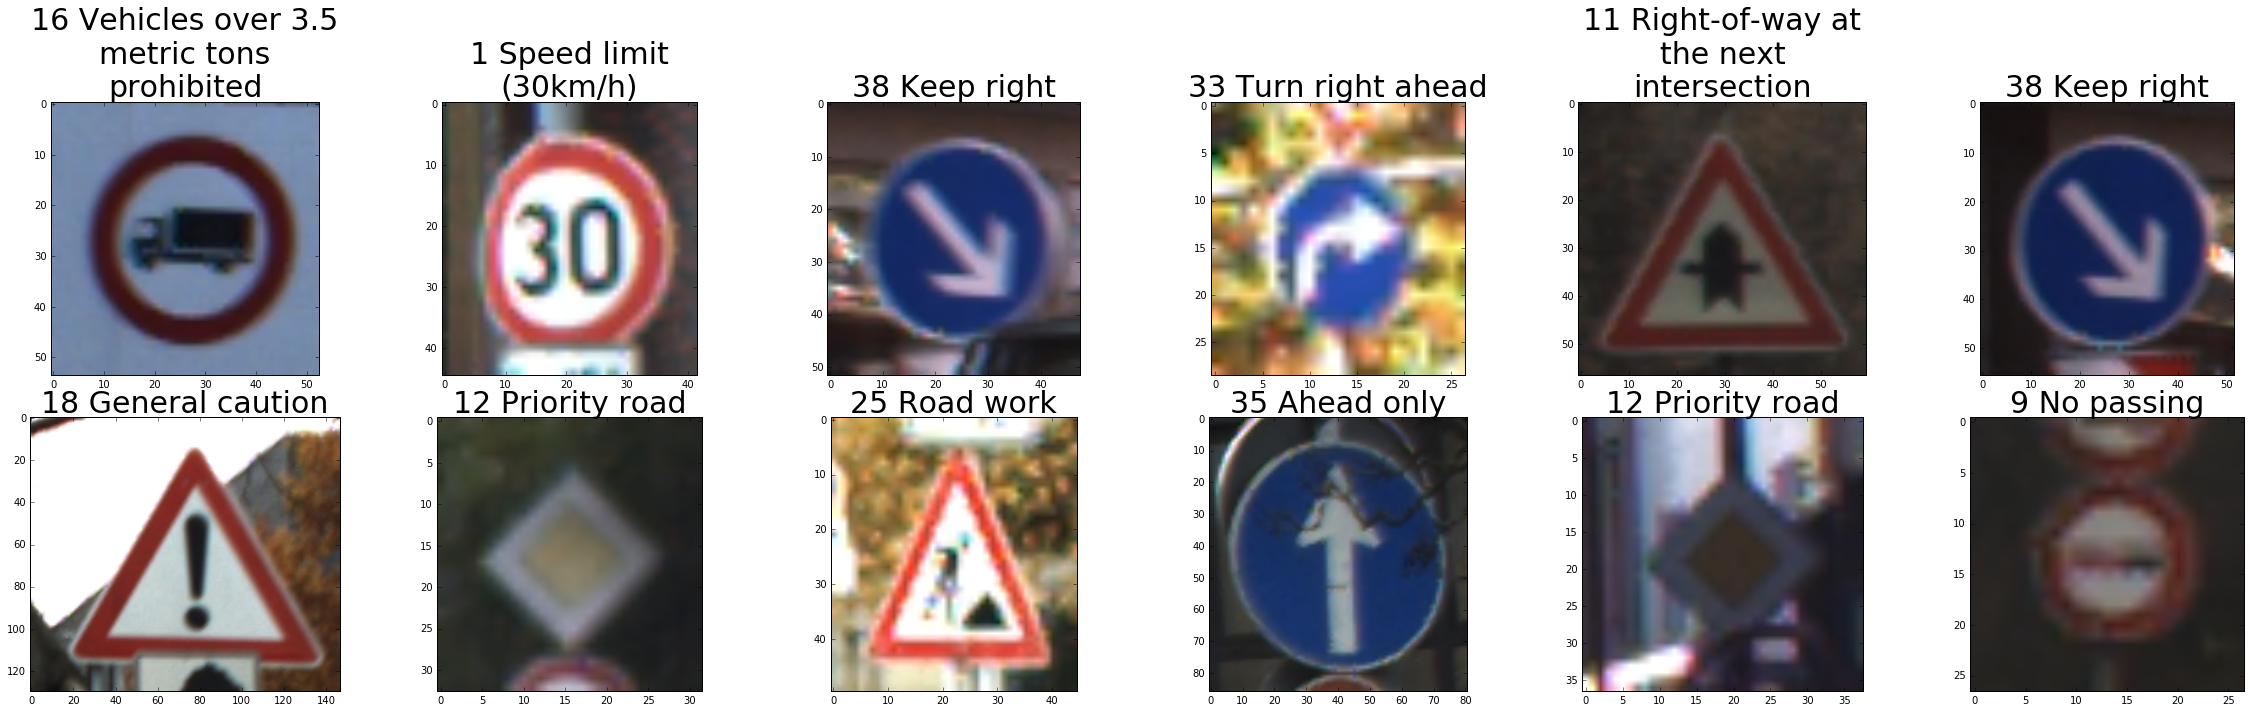

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
img_resize = normalize(rgb2gray(img_resize))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logit = sess.run(tf.argmax(logits, 1), feed_dict={x:img_resize,keep_prob:1, keep_prob_conv:1})

fig = plt.figure(figsize=(32,10), tight_layout={'h_pad':0})
for i in range(numImage):
    img = imread("sign_data/"+ filename[i])
    ax = fig.add_subplot(2,6,i+1) 
    ax.imshow(img)
    title = str(logit[i]) + " " + mydict[logit[i]]
    ax.set_title("\n".join(wrap(title, 20)), fontsize=30)
    #print(mydict[logit[i]])
plt.show()        

### Analyze Performance

By comparing the predicted traffic signs with the correct labels, as well as a sample image from the training set, it turns out that all the signs are predicted correctly with 100% accuracy, as shown below.

Index|File Name|Correct Label|Predicted Label|Correct?
-|----|---|---|---
1|00000.ppm|16|16|Correct
2|00001.ppm|1|1|Correct
3|00002.ppm|38|38|Correct
4|00003.ppm|33|33|Correct
5|00004.ppm|11|11|Correct
6|00005.ppm|38|38|Correct
7|00006.ppm|18|18|Correct
8|00007.ppm|12|12|Correct
9|00008.ppm|25|25|Correct
10|00009.ppm|35|35|Correct
11|00010.ppm|12|12|Correct
12|00015.ppm|9|9|Correct

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


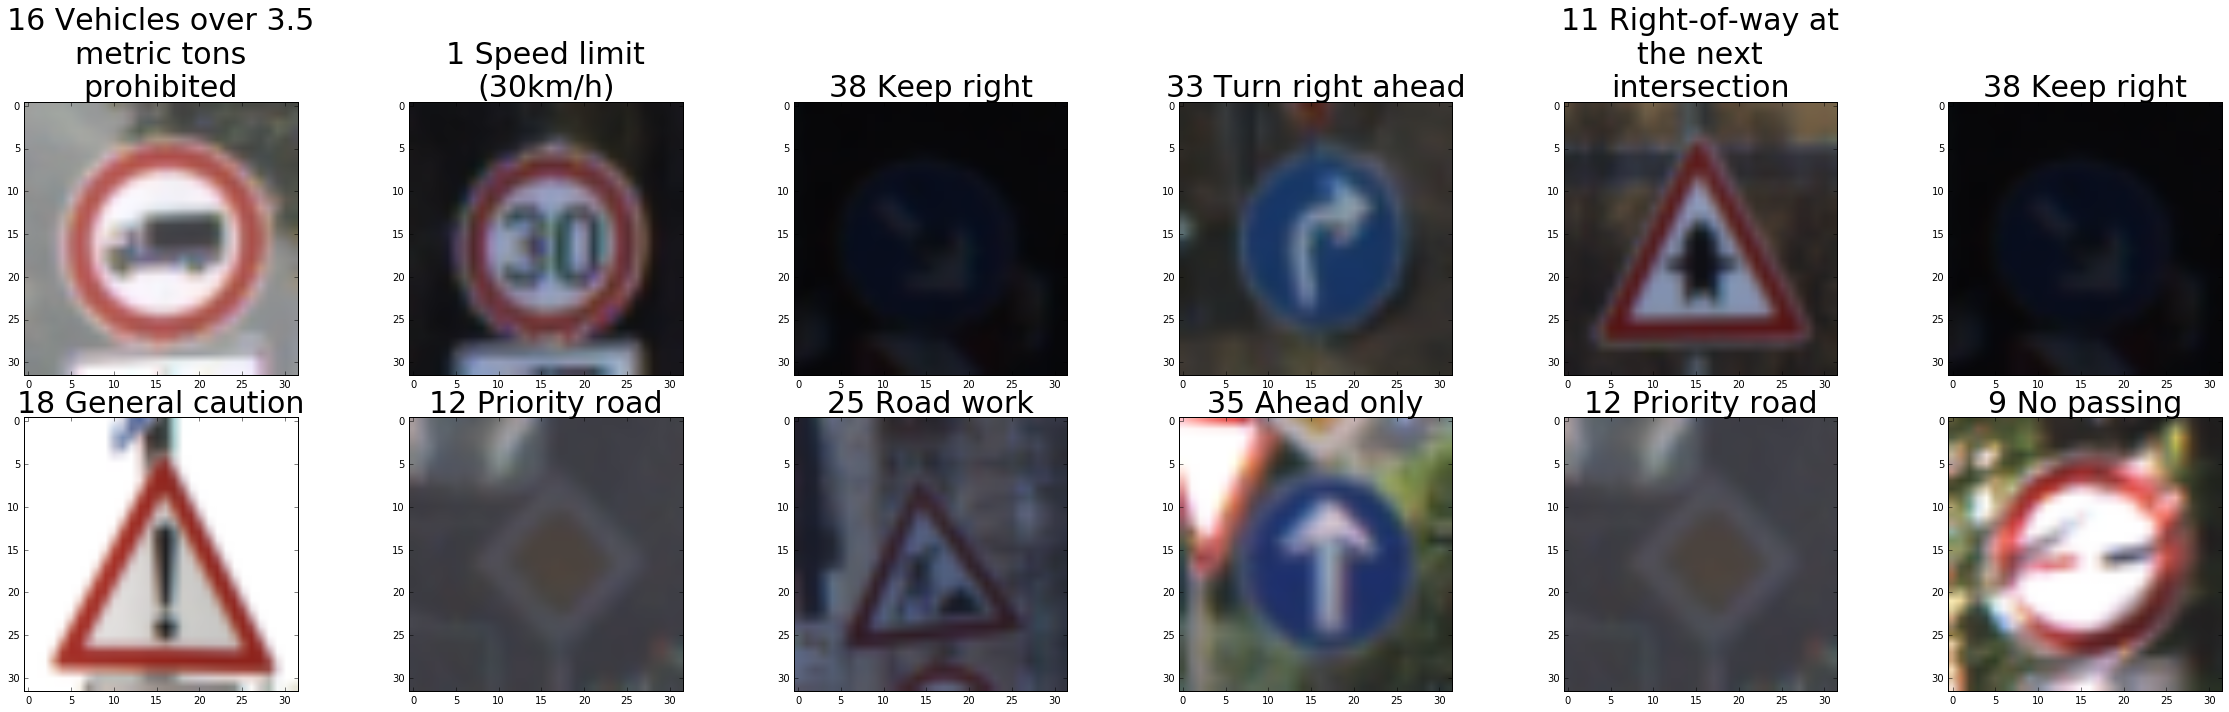

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
fig = plt.figure(figsize=(32,10), tight_layout={'h_pad':0})
for i in range(numImage):
    ind = np.where(y_train_orig==logit[i])
    #print(ind)
    indsample = ind[0][100]
    #print(logit[i],y_train[indsample], )
    img = X_train_orig[indsample]
    img = img.squeeze()
    ax = fig.add_subplot(2,6,i+1) 
    ax.imshow(img)
    title = str(y_train_orig[indsample])+" "+ mydict[y_train_orig[indsample]]
    ax.set_title("\n".join(wrap(title, 20)), fontsize=30)
plt.show()


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In this step, I calculated the softmax probabilities for the predictions, the highest probability is always very close to 100% for each predictions. This means the model result is
quite certain.

In [57]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmaxs = sess.run(tf.nn.softmax(logits, 1), feed_dict={x:img_resize,keep_prob:1, keep_prob_conv:1})
    topsoftmaxs = sess.run(tf.nn.top_k(tf.constant(softmaxs), k=5)) 
    print(topsoftmaxs)

INFO:tensorflow:Restoring parameters from ./lenet


INFO:tensorflow:Restoring parameters from ./lenet


TopKV2(values=array([[  1.00000000e+00,   9.21234963e-11,   1.07881521e-14,
          1.12166993e-15,   2.97612305e-16],
       [  9.99999762e-01,   2.10537266e-07,   6.64943656e-09,
          3.14124704e-09,   5.00737007e-10],
       [  1.00000000e+00,   4.59239220e-18,   2.15227414e-23,
          1.92952159e-23,   3.16902051e-24],
       [  1.00000000e+00,   9.03609219e-12,   1.56816021e-12,
          1.28972611e-13,   1.25164392e-13],
       [  9.99993324e-01,   3.95132474e-06,   2.69889256e-06,
          8.46975379e-09,   4.63339145e-09],
       [  1.00000000e+00,   1.56219076e-18,   7.90689023e-21,
          3.94099823e-21,   2.38041780e-21],
       [  1.00000000e+00,   1.64673590e-14,   1.14332873e-18,
          2.50436281e-21,   8.20176810e-25],
       [  1.00000000e+00,   1.63775109e-08,   5.45769152e-10,
          3.07729293e-11,   2.24239585e-11],
       [  1.00000000e+00,   5.84692681e-20,   7.49660945e-21,
          2.01215864e-21,   7.91195479e-22],
       [  1.00000000e+0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [51]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x:image_input,keep_prob:1, keep_prob_conv:1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

I have examined the feature map of convolutional layer 1 and 2, and the feature maps are printed as follows.

INFO:tensorflow:Restoring parameters from ./lenet


INFO:tensorflow:Restoring parameters from ./lenet


(1, 32, 32, 1)


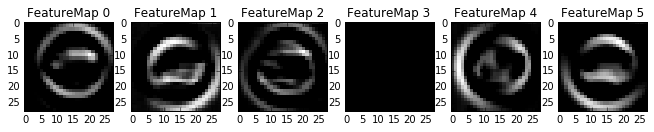

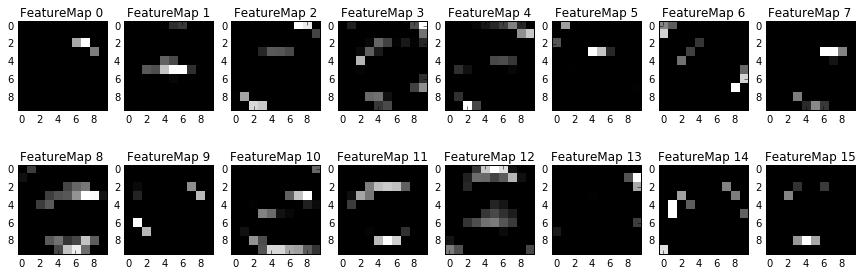

In [52]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image = img_resize[0].reshape((1,32,32,1))
    print(image.shape)
    outputFeatureMap(image, conv1_featuremap)
    outputFeatureMap(image, conv2_featuremap)